In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
with open("./results/apple.json", "r") as f:
    apple_results = json.load(f)

with open("./results/heart.json", "r") as f:
    heart_results = json.load(f)

In [3]:
marker = {
    "PC": "o",
    "A*": "*",
    "MIIC": "s",
    "HC": "^",
    "MMHC": "p",
    "TS": "X",
    "K2": "8",
    "CL": "2",
    "NB": "2",
    "TAN": "2",
}

In [4]:
def getBestAlgorithmResult(results):
    best_result = results[0]

    for result in results[1:]:
        if result["metrics"]["accuracy"] > best_result["metrics"]["accuracy"]: best_result = result

    return best_result

In [5]:
def plotAccuracy(results, title, groupby_algo=False):
    def _registerResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        data.loc[len(data)] = [label, result["metrics"]["accuracy"]]

    data = pd.DataFrame(columns=["algorithm", "accuracy"])

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _registerResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _registerResult(algorithm, result, groupby_algo)
    
    data.sort_values(by="accuracy", ascending=False, inplace=True)
    sns.barplot(data, y="algorithm", x="accuracy")
    plt.title(title)
    plt.xlabel("Accuracy")
    plt.ylabel("Algorithm")

In [6]:
def plotAccuracyEdgesScatter(results, title, groupby_algo=False):
    def _plotResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        plt.scatter(x=result["num_edges"], y=result["metrics"]["accuracy"], label=label, marker=marker[algorithm])
        if groupped: plt.annotate(label, (result["num_edges"], result["metrics"]["accuracy"]))

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _plotResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _plotResult(algorithm, result, groupby_algo)

    plt.title(title)
    plt.xlabel("Number of edges")
    plt.ylabel("Accuracy")
    if not groupby_algo:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [7]:
def plotAccuracyTimeScatter(results, title, groupby_algo=False, log_scale=False):
    def _plotResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        plt.scatter(x=result["time"]/1e6, y=result["metrics"]["accuracy"], label=label, marker=marker[algorithm])
        if groupped: plt.annotate(label, (result["time"]/1e6, result["metrics"]["accuracy"]))

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _plotResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _plotResult(algorithm, result, groupby_algo)

    plt.title(title)
    plt.xlabel("Execution time (ms)")
    plt.ylabel("Accuracy")
    if log_scale: plt.xscale("log")
    if not groupby_algo:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

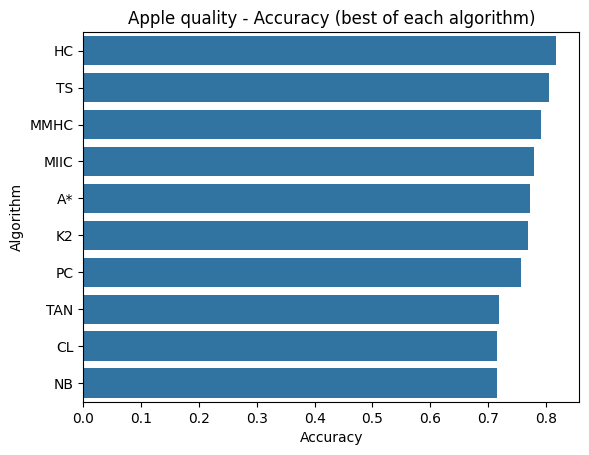

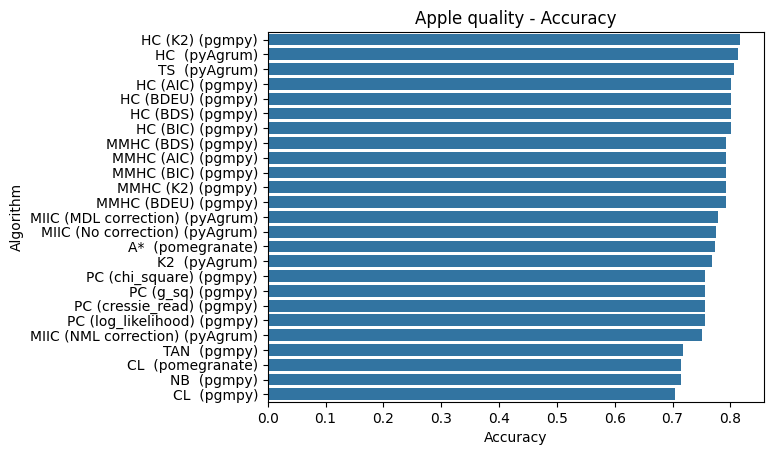

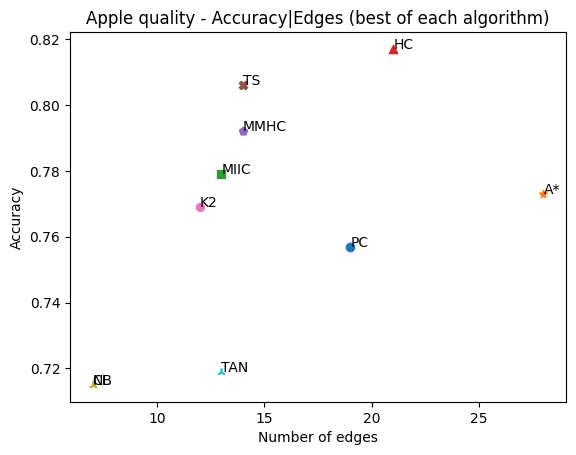

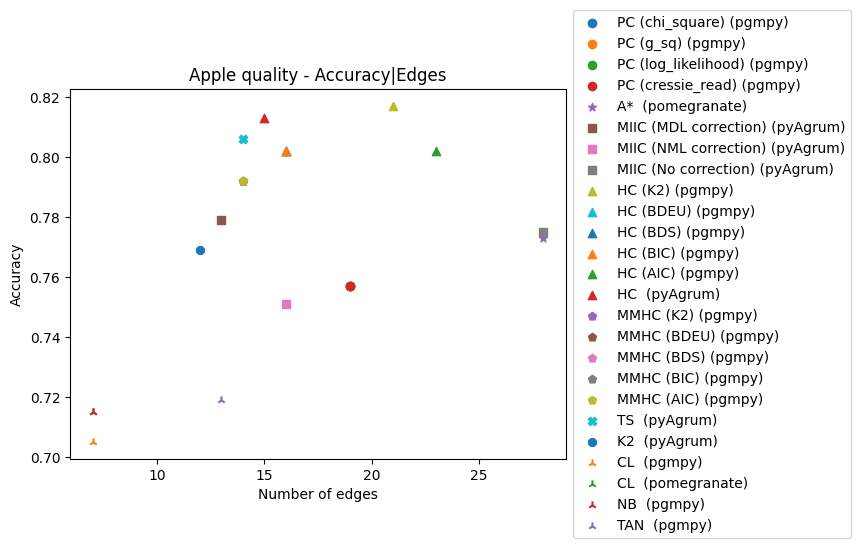

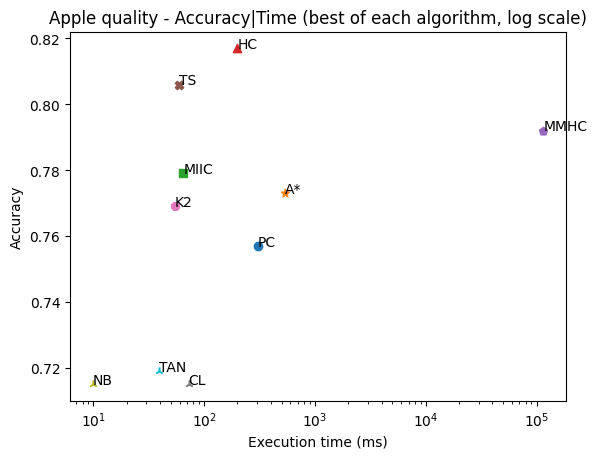

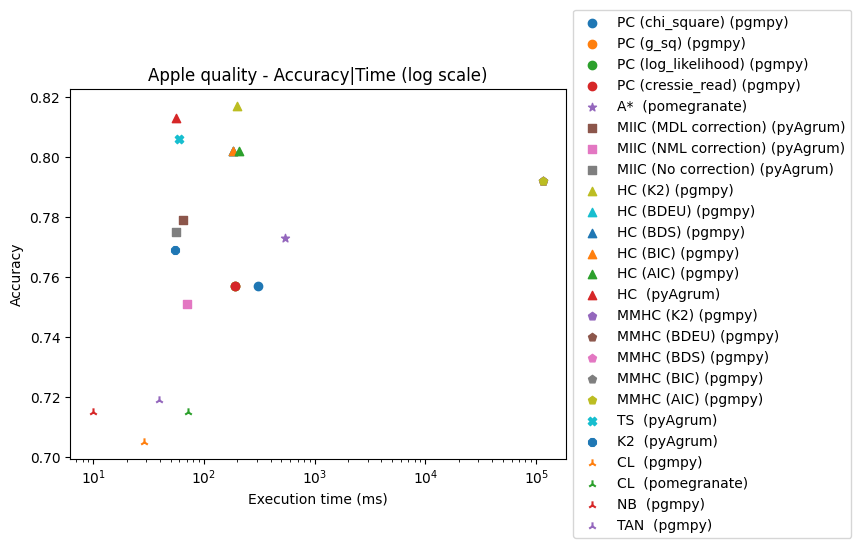

In [8]:
plotAccuracy(apple_results, "Apple quality - Accuracy (best of each algorithm)", groupby_algo=True)
plt.show()
plotAccuracy(apple_results, "Apple quality - Accuracy", groupby_algo=False)
plt.show()
plotAccuracyEdgesScatter(apple_results, "Apple quality - Accuracy|Edges (best of each algorithm)", groupby_algo=True)
plt.show()
plotAccuracyEdgesScatter(apple_results, "Apple quality - Accuracy|Edges", groupby_algo=False)
plt.show()
plotAccuracyTimeScatter(apple_results, "Apple quality - Accuracy|Time (best of each algorithm, log scale)", groupby_algo=True, log_scale=True)
plt.show()
plotAccuracyTimeScatter(apple_results, "Apple quality - Accuracy|Time (log scale)", groupby_algo=False, log_scale=True)
plt.show()

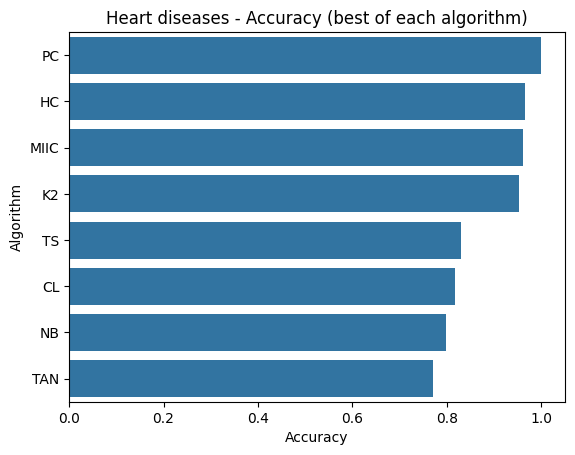

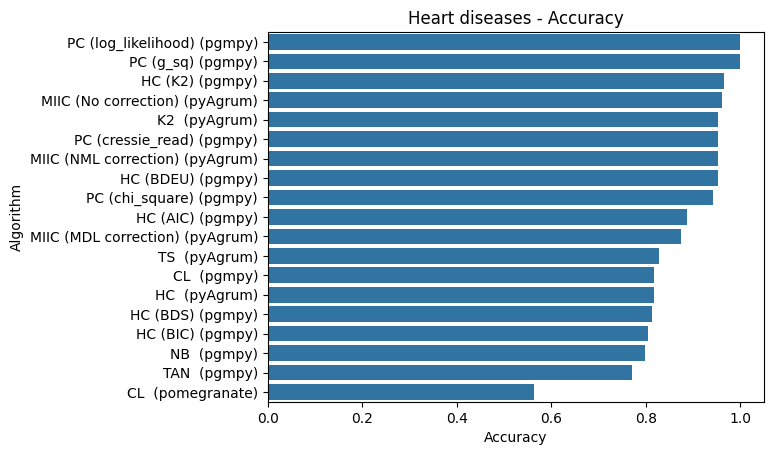

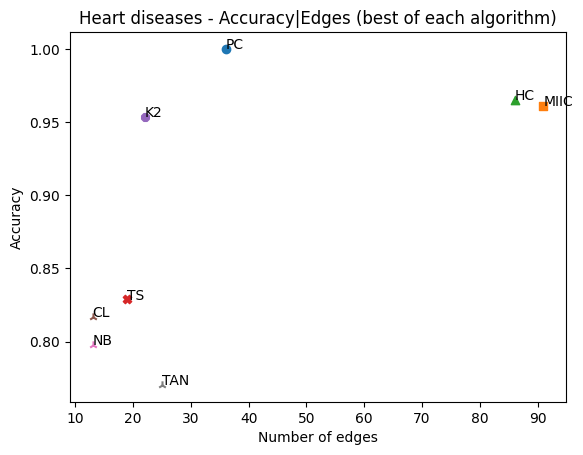

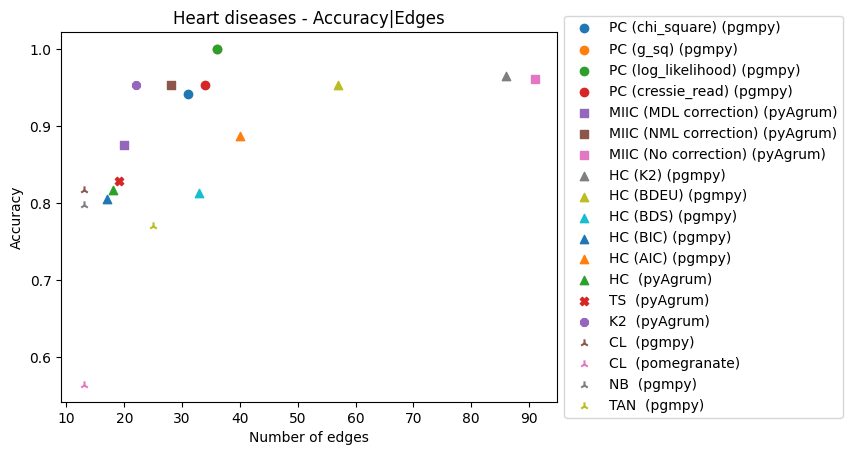

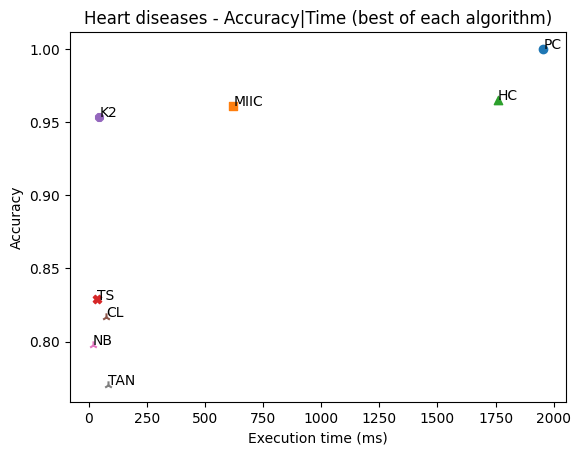

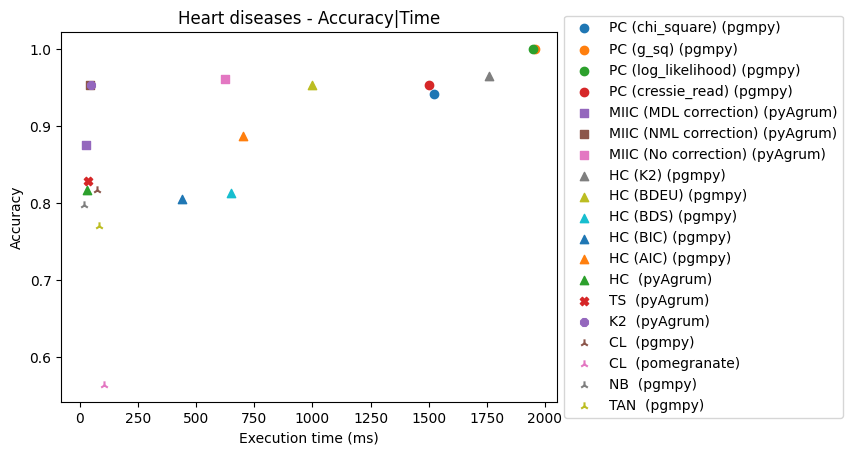

In [9]:
plotAccuracy(heart_results, "Heart diseases - Accuracy (best of each algorithm)", groupby_algo=True)
plt.show()
plotAccuracy(heart_results, "Heart diseases - Accuracy", groupby_algo=False)
plt.show()
plotAccuracyEdgesScatter(heart_results, "Heart diseases - Accuracy|Edges (best of each algorithm)", groupby_algo=True)
plt.show()
plotAccuracyEdgesScatter(heart_results, "Heart diseases - Accuracy|Edges", groupby_algo=False)
plt.show()
plotAccuracyTimeScatter(heart_results, "Heart diseases - Accuracy|Time (best of each algorithm)", groupby_algo=True)
plt.show()
plotAccuracyTimeScatter(heart_results, "Heart diseases - Accuracy|Time", groupby_algo=False)
plt.show()